In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [14]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [15]:
# Read NIRV reflectance raster image
img_900 = rio.open(cwd_Images_Processed + "\\Robson Creek rainforest\\NIRV 900m.tif")
# img_900 = rio.open(cwd_Images_Processed + "\\San Rossore\\NIRV Reflectance 1350m.tif")
band_900 = img_900.read(1)
band_900.shape

(91, 91)

In [16]:
band_900[0,1]

64.82810772810748

In [17]:
band_900_reshape = band_900.reshape(-1)
band_900_reshape = band_900_reshape
band_900_reshape

array([58.37999279, 64.82810773, 63.55216792, ..., 63.57893017,
       45.72562245, 37.61199858])

In [18]:
# Get the coordinates
list_Coordinates = []
for x in range(img_900.shape[0]):
    for y in range(img_900.shape[1]):
        temp_x, temp_y = img_900.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates.append(temp_list)
arr_Coordinates = np.array(list_Coordinates)
arr_Coordinates

array([[ 351385., 8106305.],
       [ 351395., 8106305.],
       [ 351405., 8106305.],
       ...,
       [ 352265., 8105405.],
       [ 352275., 8105405.],
       [ 352285., 8105405.]])

In [19]:
diagonal_900 = 900 * (2 ** 0.5) * 1/2
# diagonal_1350 = 1360 * (2 ** 0.5) * 1/2
bin_900 = np.arange(10,diagonal_900,10)
# bin_1350 = np.arange(10,1010,30)
# bin_1350 = np.append(bin_1350, 2000)
bin_900

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200., 210., 220.,
       230., 240., 250., 260., 270., 280., 290., 300., 310., 320., 330.,
       340., 350., 360., 370., 380., 390., 400., 410., 420., 430., 440.,
       450., 460., 470., 480., 490., 500., 510., 520., 530., 540., 550.,
       560., 570., 580., 590., 600., 610., 620., 630.])

In [26]:
V = skg.Variogram(arr_Coordinates, band_900_reshape, use_nugget=True, bin_func=bin_900, maxlag = bin_900[-1])

In [27]:
V.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 396899.9999999999,
 'normalized_sill': 10175.319712642913,
 'normalized_nugget': 9079.848413143483,
 'effective_range': 629.9999999999998,
 'sill': 72.08983323393879,
 'nugget': 64.3286674402629,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 630.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

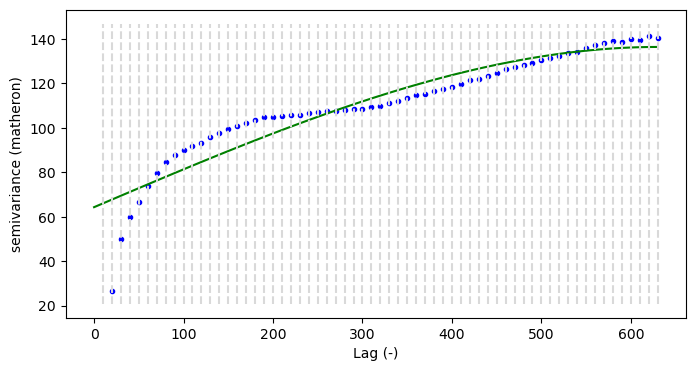

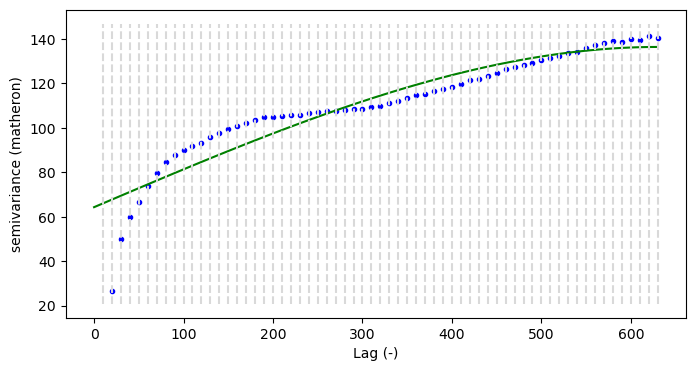

In [28]:
V.plot(show = False, hist = False)

In [11]:
V = skg.Variogram(arr_Coordinates, band_900_reshape, use_nugget=True, bin_func=bin_1350, maxlag=1000)

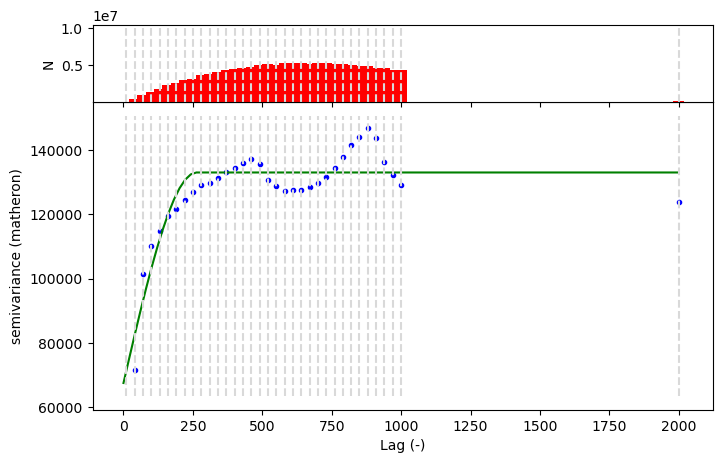

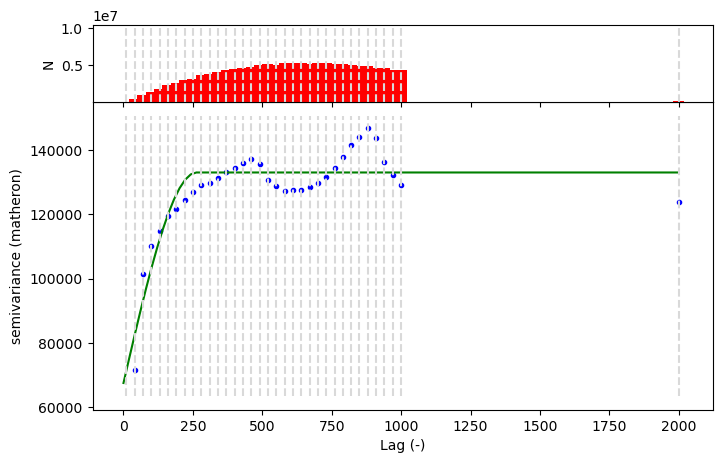

In [12]:
V.plot(show = False, hist = True)

In [11]:
V.experimental

array([0.07734961, 0.11293776, 0.1241327 , 0.13102   , 0.1344806 ,
       0.13576726, 0.1273377 , 0.1235185 , 0.12381327, 0.12484256,
       0.12584662, 0.12877219, 0.13180479, 0.13687217, 0.14421247,
       0.14669912, 0.13262918, 0.12616962, 0.12070212, 0.11810925,
       0.1160494 , 0.11763349, 0.12014483, 0.11965806, 0.11595992,
       0.10255954, 0.08481626, 0.07818763, 0.06987464, 0.06806856])

In [12]:
m = V.data(n = 8100)[0]
m

array([0.00000000e+00, 1.55408084e-04, 3.10816168e-04, ...,
       1.25833925e+00, 1.25849466e+00, 1.25865007e+00])

In [13]:
range = V.parameters[0]
range

0.106649327687373

In [14]:
for ele in m:
    if ele == range:
        print("A")

In [15]:
V.distance

array([0.01, 0.02, 0.03, ..., 0.01, 0.02, 0.01])

In [16]:
V.get_empirical()

(array([0.041955  , 0.08391   , 0.12586501, 0.16782001, 0.20977501,
        0.25173001, 0.29368502, 0.33564002, 0.37759502, 0.41955002,
        0.46150503, 0.50346003, 0.54541503, 0.58737003, 0.62932504,
        0.67128004, 0.71323504, 0.75519004, 0.79714504, 0.83910005,
        0.88105505, 0.92301005, 0.96496505, 1.00692006, 1.04887506,
        1.09083006, 1.13278506, 1.17474007, 1.21669507, 1.25865007]),
 array([0.07734961, 0.11293776, 0.1241327 , 0.13102   , 0.1344806 ,
        0.13576726, 0.1273377 , 0.1235185 , 0.12381327, 0.12484256,
        0.12584662, 0.12877219, 0.13180479, 0.13687217, 0.14421247,
        0.14669912, 0.13262918, 0.12616962, 0.12070212, 0.11810925,
        0.1160494 , 0.11763349, 0.12014483, 0.11965806, 0.11595992,
        0.10255954, 0.08481626, 0.07818763, 0.06987464, 0.06806856]))